In [ ]:
# default_exp core

# Core

> API details.

In [ ]:
#hide
from nbdev.showdoc import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#export
def hello():
    print(hello)

In [ ]:
#export
import numpy as np
class uniform_gravity_2d():
    def __init__(self,g=9.8):
        self.g=g
        self.a=np.array([0,-self.g]) 
        self.objects = []
        
    def time_step(self,delta_t=0.01):
        for o in self.objects:
            self.evolve(o,delta_t=delta_t)
            if o.x[1]<0:
                o.x[1]*=-1
                o.v[1]*=-0.7
                
    def evolve(self,o,delta_t):
        #applies evolution to position (2d array)
        o.v += self.a*delta_t
        o.x += o.v*delta_t +1./2*self.a*delta_t**2

class Ball():
    def __init__(self,x=np.array([0.,0.]),v=np.array([0.,0.])):
        self.x = x.astype(float)
        self.v = v.astype(float)

# Equations of motion in uniform gravity
$$\Delta v = g*\Delta t$$
$$\Delta x = v*\Delta t+ 1/2*g*(\Delta t)^2$$

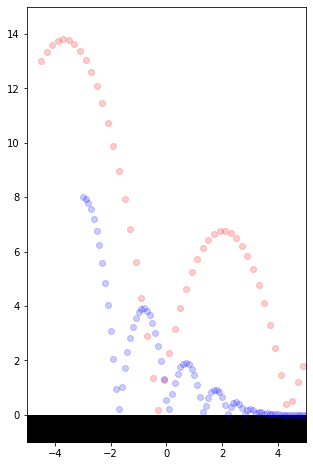

In [ ]:
world = uniform_gravity_2d()
world.objects.append(Ball(x=np.array([-3,8]),v=np.array([1,0])))
world.objects.append(Ball(x=np.array([-4.5,13]),v=np.array([2,4])))
colors = ['b','r']
f,ax = plt.subplots(1,1,figsize=(5,8))
ax.set_ylim(-1,15)
ax.set_xlim(-5,5)

ax.fill_between(np.linspace(-5,5),[-1]*50,[0]*50,color='k')
for i in range(10000):
    for j,o in enumerate(world.objects):
        if i% 50==0:
            ax.scatter(o.x[0],o.x[1],color=colors[j],alpha=0.2)
        world.time_step(delta_t=0.001)